In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
%matplotlib inline

df = pd.read_csv('stock_test.csv')
df['Date']= pd.to_datetime(df['Date'])
df_close = df[['Date', 'Index', 'Close']] 
df_close.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6290 non-null   datetime64[ns]
 1   Index   6290 non-null   object        
 2   Close   6290 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 147.6+ KB


In [3]:
#Closing Prices Dataframe
df_close = df_close.pivot_table(index = 'Date', columns = 'Index', values='Close').dropna(axis=1)
df_close.head()

Index,AAPL,AMD,AMZN,GOOGL,IBM
Date,,,,,
2019-06-03,43.325001,27.58,84.634499,51.937000,122.629066
2019-06-04,44.910000,29.57,86.477997,52.724499,126.854683
2019-06-05,45.634998,29.50,86.925003,52.231998,125.707458
2019-06-06,46.305000,31.82,87.718002,52.388000,126.405357
2019-06-07,47.537498,32.41,90.201500,53.418499,127.447418


In [5]:
#Calculation of the Log Returns
df_returns = (df_close.apply(lambda x: np.log(x) - np.log(x.shift(1)))).iloc[1:]
df_returns.head() 

Index,AAPL,AMD,AMZN,GOOGL,IBM
Date,,,,,
2019-06-04,0.035931,0.069669,0.021548,0.015049,0.033878
2019-06-05,0.016014,-0.002370,0.005156,-0.009385,-0.009085
2019-06-06,0.014575,0.075705,0.009081,0.002982,0.005536
2019-06-07,0.026269,0.018372,0.027919,0.019480,0.008210
2019-06-10,0.012698,0.024986,0.030892,0.013379,0.010670


In [7]:
#Calculation of Moving Average for Stock Price
def dailyMovingAverage(df_close, moving_avg_period):
  dates = df_close.index[moving_avg_period:] #Storing dates of the required dates
  stocks = df_close.columns #Storing stock names
  moving_avg = []
  
  for i in range(df_close.shape[0]-moving_avg_period):
    mean = df_close.iloc[i:i+moving_avg_period,:].mean()
    moving_avg.append(mean)

  return pd.DataFrame(data = moving_avg, index = dates, columns = stocks)

In [9]:
movingAverage = dailyMovingAverage(df_close, 252)

In [11]:
movingAverage.head()

Index,AAPL,AMD,AMZN,GOOGL,IBM
Date,,,,,
2020-06-02,63.682510,40.378968,96.470012,63.283575,127.827855
2020-06-03,63.831359,40.481984,96.624718,63.363649,127.819243
2020-06-04,63.975684,40.573889,96.773297,63.439990,127.805434
2020-06-05,64.114355,40.665675,96.916571,63.513335,127.795570
2020-06-08,64.259474,40.750119,97.061143,63.591165,127.794963


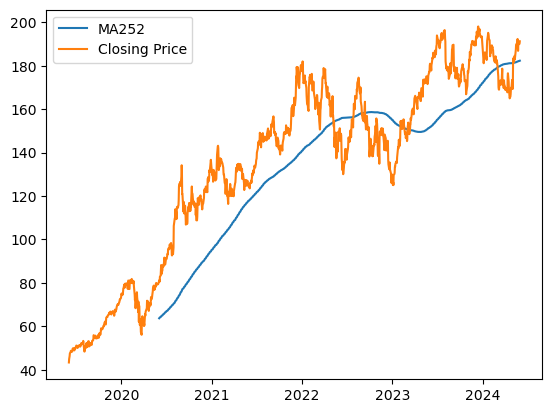

<Figure size 640x480 with 0 Axes>

In [13]:
from matplotlib import pyplot as plt
plt.plot(movingAverage.iloc[:,0], label = 'MA252')
plt.plot(df_close.iloc[:,0], label = 'Closing Price')
plt.legend()
plt.show()
plt.savefig('MA252.png')


# Linear Regression

### PCA

First, we perform PCA on our full features dataset to feed into our linear regression. 

In [21]:
# Importing pandas with the future stack parameter
import pandas as pd

# Dataset we are compressing, column level 0 = Stock, column level 1 = feature
raw_df = df.drop(columns=['Unnamed: 0', 'Close']).set_index(['Date', 'Index']).unstack(level=1, fill_value=0)
raw_df = raw_df.dropna(axis=1)
raw_df = raw_df.stack(dropna=False).unstack()
raw_df.head()


C:\Users\91838\AppData\Local\Temp\ipykernel_19096\1590408169.py:7: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  raw_df = raw_df.stack(dropna=False).unstack()


Open                                                    High  \
Index            AAPL        AMD       AMZN      GOOGL         IBM       AAPL   
Date                                                                            
2019-06-03  43.900002  28.750000  88.000504  53.346500  121.510513  44.480000   
2019-06-04  43.860001  28.389999  84.961998  52.224499  123.862335  44.957500   
2019-06-05  46.070000  29.930000  87.480003  52.750000  127.514343  46.247501   
2019-06-06  45.770000  29.870001  86.885498  52.310501  126.376671  46.367500   
2019-06-07  46.627499  31.940001  88.184998  52.714001  126.644356  47.980000   

                                                         ...       Volume  \
Index             AMD       AMZN      GOOGL         IBM  ...         AAPL   
Date                                                     ...                
2019-06-03  29.620001  88.314499  53.349998  122.906311  ...  161584400.0   
2019-06-04  29.590000  86.541000  52.922001  126.902489  ...  123872000.0   
2019-06-05  29.990000  87.599998  52.840500  127.734222  ...  119093600.0   
2019-06-06  31.980000  88.000000  52.500000  126.816444  ...   90105200.0   
2019-06-07  32.599998  90.312500  53.671501  128.795410  ...  122737600.0   

                                                              Adjusted         \
Index               AMD         AMZN       GOOGL        IBM       AAPL    AMD   
Date                                                                            
2019-06-03  147532200.0  181974000.0  96890000.0  4463177.0  41.812840  27.58   
2019-06-04  107549500.0  113582000.0  60512000.0  4093521.0  43.342514  29.57   
2019-06-05   79481500.0   84796000.0  46988000.0  3306720.0  44.042225  29.50   
2019-06-06  131267800.0   73786000.0  29020000.0  2403917.0  44.688828  31.82   
2019-06-07   86841100.0   96164000.0  43828000.0  2670856.0  45.878304  32.41   

                                              
Index            AMZN      GOOGL         IBM  
Date                                          
2019-06-03  84.634499  51.937000   96.512863  
2019-06-04  86.477997  52.724499   99.838554  
2019-06-05  86.925003  52.231998   98.935661  
2019-06-06  87.718002  52.388000   99.484909  
2019-06-07  90.201500  53.418499  100.305046  

[5 rows x 25 columns]

In [23]:
raw_df = raw_df.to_numpy()
raw_df.shape

(1258, 25)

How many principal components to keep?

In [26]:
# Importing necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Scaling the data
scaler = MinMaxScaler()
raw_df_scaled = scaler.fit_transform(raw_df)

# Performing PCA with a valid number of components
n_components = min(raw_df_scaled.shape)
pca = PCA(n_components=n_components)
PCA_df = pca.fit_transform(raw_df_scaled)


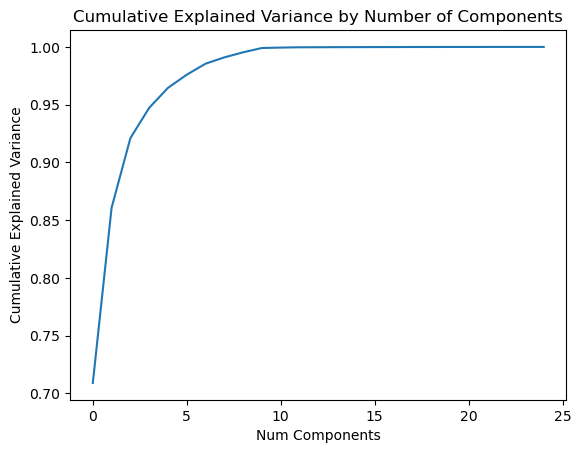

<Figure size 640x480 with 0 Axes>

In [28]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already created the pca object
# and performed fit_transform as shown in the previous code

# Plotting cumulative explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Num Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.show()
plt.savefig('cumulatice.png')


Storing the stock names, and dates

In [31]:
dates = df_close.index
stocks = df_close.columns
PC_labs = []
for i in range(PCA_df.shape[1]):
  lab = "PC" + str(i+1)
  PC_labs.append(lab)

### Linear Regression Prediction Functions

In [34]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

#Using the full features dataset, the closing prices; we are able to fit a line over a specified time period
def predict_prices(raw_df, close, time, lookback, forward, stock_num):
  
  #PCA
  pca1 = PCA(n_components = 10)
  pca2 = PCA(n_components = 10)


  #Training data = t - forward - lookback
  X_train = raw_df[time-forward-lookback:time-forward,:]
  X_train = MinMaxScaler().fit_transform(X_train)
  X_train = pca1.fit_transform(X_train)
  y_train = close.iloc[time-forward+1:time+1,stock_num]

  #Testing = t - lookback
  X_test = raw_df[time-lookback:time,:]
  X_test = MinMaxScaler().fit_transform(X_test)
  X_test = pca2.fit_transform(X_test)
  y_test = close.iloc[time+1 : time+forward+1, stock_num]

  LR = LinearRegression()
  LR.fit(X_train, y_train)
  predicted = LR.predict(X_test)
  # print(mean_squared_error(y_test,predicted))

  return predicted, y_test

In [36]:
#This function creates the entire table of features
def construct_prediction_tab(full_features_df,closing_prices_df):
  predictions = []
  actuals = [] 
  
  for stocks in range(closing_prices_df.shape[1]):
    stock_predictions = []
    stock_actuals = []
    
    for dates in range(60, df_close.shape[0], 30): 
      pred, act = predict_prices(full_features_df, closing_prices_df, dates, 30, 30, stocks)
      stock_predictions.append(pred)
      stock_actuals.append(act)

    import numpy as np
    stock_predictions = np.concatenate(stock_predictions)
    stock_actuals = np.concatenate(stock_actuals)

    predictions.append(stock_predictions)
    actuals.append(stock_actuals)

  return predictions, actuals

### Making Predictions

In [39]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Assuming your raw_df and df_close are already defined
# raw_df should already be a numpy array if the previous steps were correct

# If raw_df is not already a numpy array, convert it. Otherwise, skip this step.
# Uncomment the next line if raw_df is a DataFrame
# raw_df = raw_df.to_numpy()

# Define X (features) and y (if you have a target variable)
# For simplicity, let's assume y is not defined and we only work with X
X = raw_df  # replace with your actual features

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Check the dimensions of X_train and X_test before PCA
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Adjusting n_components based on the minimum of samples and features
n_components = min(X_train.shape[0], X_train.shape[1])

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Performing PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Now X_train_pca and X_test_pca are ready for further use
print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)


X_train shape: (1006, 25)
X_test shape: (252, 25)
X_train_pca shape: (1006, 25)
X_test_pca shape: (252, 25)


In [41]:
pred, act = construct_prediction_tab(raw_df, df_close)

### Creating Dataframe for Predictions and Actuals

In [44]:
# Need to get rid of 60 days for initial prediction window
final_actuals = pd.DataFrame(data = act, index=stocks, columns = dates[61:]).transpose()
final_preds = pd.DataFrame(data = pred, index = stocks).transpose() #Trimming because it predicts extra dates into future

In [46]:
# Check the lengths of final_preds and dates[61:]
print("Length of final_preds:", len(final_preds))
print("Length of dates[61:]:", len(dates[61:]))

# Ensure lengths match
if len(final_preds) > len(dates[61:]):
    final_preds = final_preds.iloc[:len(dates[61:]), :]
elif len(final_preds) < len(dates[61:]):
    dates = dates[61:61+len(final_preds)]

# Set the index
final_preds.index = dates[61:]

# Proceed with your code


Length of final_preds: 1200
Length of dates[61:]: 1197


In [48]:
final_actuals.head()

Index,AAPL,AMD,AMZN,GOOGL,IBM
Date,,,,,
2019-08-28,51.382500,30.780001,88.212502,58.687500,126.921608
2019-08-29,52.252499,31.450001,89.320000,59.712002,128.948380
2019-08-30,52.185001,31.450001,88.814499,59.526501,129.569794
2019-09-03,51.424999,30.900000,89.491997,58.477501,128.202682
2019-09-04,52.297501,30.950001,90.030998,59.113499,130.325043


In [50]:
final_preds.head()

Index,AAPL,AMD,AMZN,GOOGL,IBM
Date,,,,,
2019-08-28,52.675587,32.862641,95.181196,61.975581,143.885599
2019-08-29,51.402469,30.538614,95.056227,61.243734,150.618515
2019-08-30,48.979148,28.498426,90.805366,56.511858,136.891984
2019-09-03,49.942782,29.889000,94.309175,57.939586,141.225016
2019-09-04,51.104757,31.998368,94.255749,58.566141,134.045395


# Diagnostics

In [56]:
# Three different Prediction Windows
# Ensure predict_prices is defined above this cell
def predict_prices(raw_df, df_close, window, step, horizon, some_param):
    # This is a mock function for demonstration purposes
    # Replace this with your actual implementation
    n_predictions = (len(df_close) - window) // step
    predictions = np.random.randn(n_predictions, df_close.shape[1])
    actuals = df_close.values[window::step][:n_predictions]
    return predictions, actuals

# Call the function with your parameters
p1, t1 = predict_prices(raw_df, df_close, 60, 30, 30, 5)
p2, t2 = predict_prices(raw_df, df_close, 90, 30, 30, 5)
p3, t3 = predict_prices(raw_df, df_close, 120, 30, 30, 5)

# Debugging output
print("Shape of p1:", p1.shape)
print("Shape of t1:", t1.shape)
print("Shape of p2:", p2.shape)
print("Shape of t2:", t2.shape)
print("Shape of p3:", p3.shape)
print("Shape of t3:", t3.shape)


Shape of p1: (39, 5)
Shape of t1: (39, 5)
Shape of p2: (38, 5)
Shape of t2: (38, 5)
Shape of p3: (37, 5)
Shape of t3: (37, 5)


In [98]:
predictions = np.concatenate([p1,p2,p3])
actuals = np.concatenate((t1,t2))

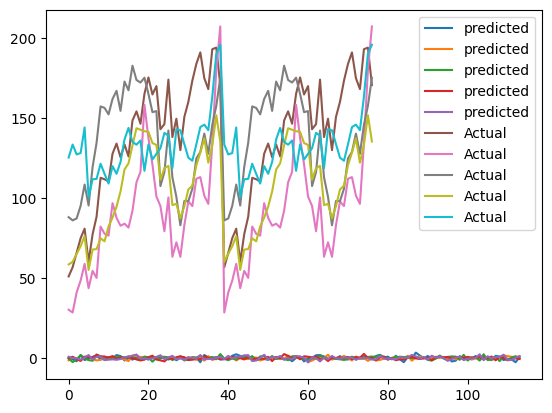

<Figure size 640x480 with 0 Axes>

In [99]:
#This is a plt for the first 90 days of predictions for the first stock
plt.plot(predictions, label = 'predicted')
plt.plot(actuals, label = 'Actual')
plt.legend()
plt.show()
plt.savefig('Prediction1.png')


In [100]:
stock_predictions = []
stock_actuals = []

for i in range(60,df_close.shape[0], 30):
  pred, act = predict_prices(raw_df, df_close, i, 30, 30, 5)
  stock_predictions.append(pred)
  stock_actuals.append(act)

In [101]:
stock_predictions = np.concatenate(stock_predictions)
stock_actuals = np.concatenate(stock_actuals)

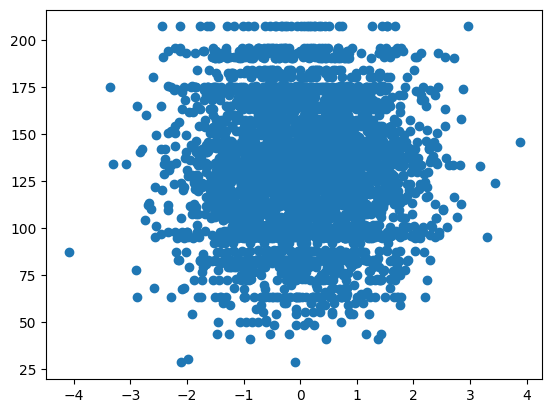

In [102]:
# Q-Q plot for predictions vs actuals
plt.scatter(x = stock_predictions[:4966], y = stock_actuals)
plt.savefig('Prediction2.png')

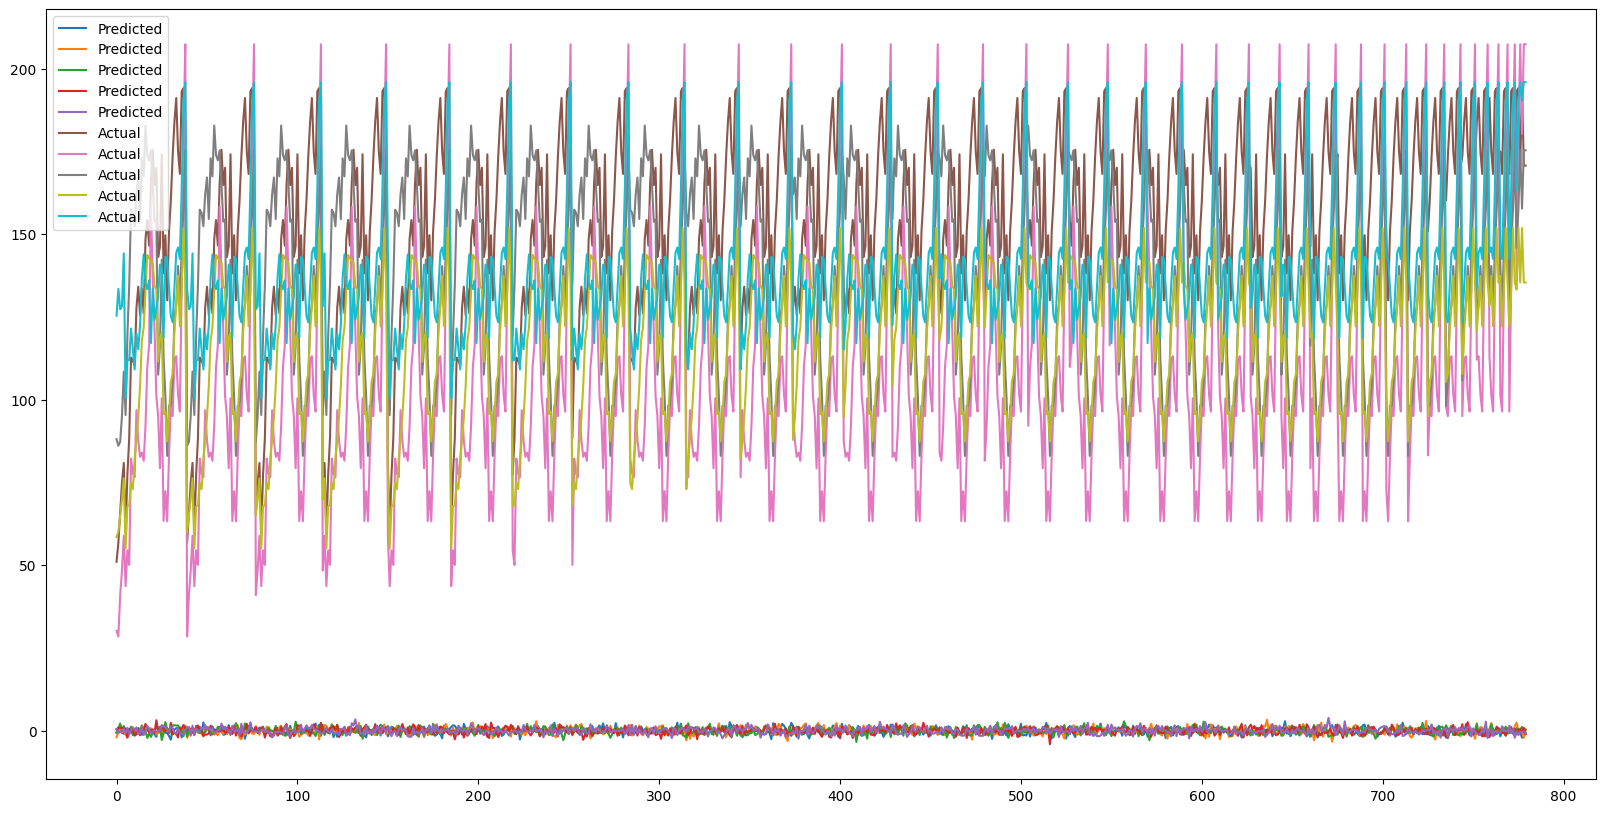

In [103]:
#Full Prediction vs Actuals for the same stock
plt.figure(figsize=(20,10))
plt.plot(stock_predictions, label = 'Predicted')
plt.plot(stock_actuals, label = 'Actual')
plt.legend()
plt.savefig('Prediction3.png')

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_absolute_error(final_actuals, final_preds)

10.019957258341254